# Установка библиотек

In [1]:
!pip install --upgrade numpy pandas

In [2]:
!pip install --upgrade git+https://github.com/ParkhomenkoDV/gte.git@master

  Cloning https://github.com/ParkhomenkoDV/gte.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-5ctdid3z
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/gte.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-req-build-5ctdid3z
  Resolved https://github.com/ParkhomenkoDV/gte.git to commit df4b0a7c40658df55a2fa8199bbb215c56a6fc21
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/ParkhomenkoDV/mathematics.git (to revision master) to /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-vgpmdhej/mathematics_7205cbd6ed944217a0559eeb6ee9024e
  Running command git clone --filter=blob:none --quiet https://github.com/ParkhomenkoDV/mathematics.git /private/var/folders/mk/r_rkj6991c17fkq5ny4k51080000gn/T/pip-install-vgpmdhej/mathematics_7205cbd6ed944217a0559eeb6ee9024

## Импорт библиотек

### Стандартные библиотеки

In [1]:
import os

import pandas as pd
import numpy as np

### Частные библиотеки

In [4]:
# from gte import GTE
from gte.nodes import Compressor, CombustionChamber  # , Turbine, Outlet

ModuleNotFoundError: No module named 'gte'

In [2]:
from thermodynamics import atmosphere_standard, Substance

ModuleNotFoundError: No module named 'decorators'

# Термодинамический расчет узла ГТД

In [ ]:
compressor = Compressor("test_compressor")

In [ ]:
compressor.summary

# Термогазодинамический расчет ГТД

## Создание ГТД

In [ ]:
gte = GTE("Jumo 004b")

## Определение облика ГТД

Схема ГТД

In [ ]:
gte.scheme = {1: [Compressor(), CombustionChamber(), Turbine(), Outlet()]}

## Задание характеристик узлов ГТД

In [ ]:
gte.scheme[1][0].σ = [0.98]
gte.scheme[1][0].g_leak = 0.005

gte.scheme[1][1].ππ = list(np.linspace(3, 9, 6 + 1))
gte.scheme[1][1].effeff = 0.86
gte.scheme[1][1].g_leak = 0.05

gte.scheme[1][2].T_fuel = 40 + 273.15
gte.scheme[1][2].η_burn = 0.99
gte.scheme[1][2].TT_o = 1800  # list(linspace(800, 1200, 4 + 1))
gte.scheme[1][2].T_lim = 1000
gte.scheme[1][2].σ = 0.94
gte.scheme[1][2].g_leak = 0

gte.scheme[1][3].effeff = 0.92
gte.scheme[1][3].η_mechanical = 0.99
gte.scheme[1][3].T_lim = 1000
gte.scheme[1][3].g_leak = 0.05

gte.scheme[1][4].PP_o = 101325
gte.scheme[1][4].eff = 0.96
gte.scheme[1][4].v_ = 0.98
gte.scheme[1][4].g_leak = 0.001

## Задание валов ГТД

In [ ]:
gte.shafts = {1: [gte.scheme[1][1], gte.scheme[1][3]]}

## Схематичная визуализация ГТД

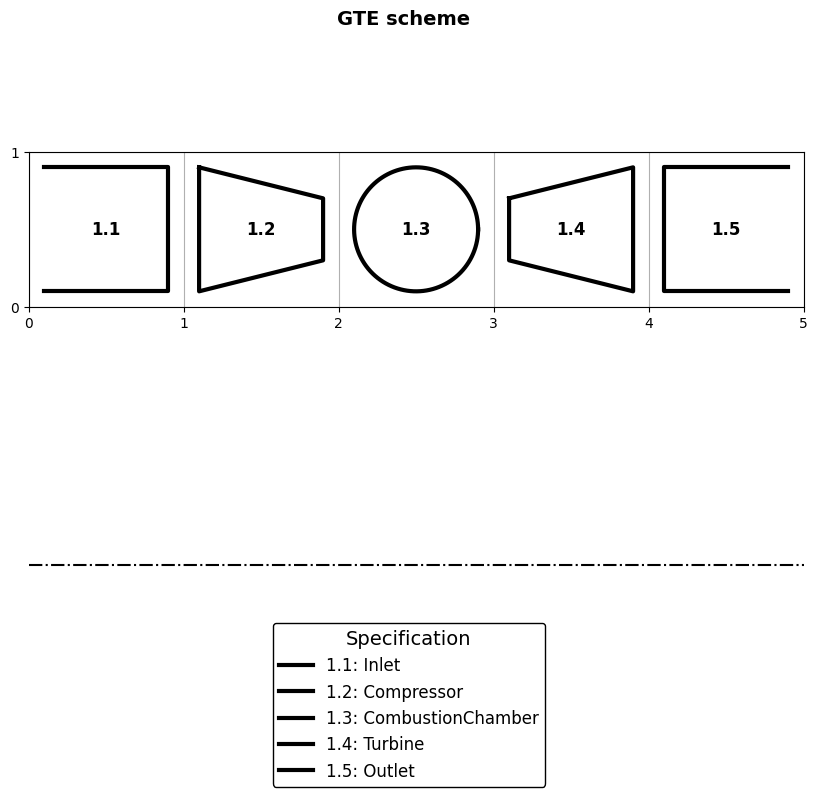

In [ ]:
gte.scheme.show()

## Определение режима работы ГТД

Высотно-скоростная характеристика

In [ ]:
gte.mode.H = 0
gte.mode.M = 0

Климатическая характеристика

In [ ]:
gte.mode.T = atmosphere_standard(0)["T"][0]
gte.mode.P = atmosphere_standard(0)["P"][0]

Требования к ГТД

In [ ]:
gte.mode.R = 10_000

## Определение рабочего тела и источника энергии ГТД

In [ ]:
gte.substance = Substance({"N2": 0.755, "O2": 0.2315, "Ar": 0.01292, "Ne": 0.000014, "H2": 0.000008})

In [ ]:
gte.fuel = Substance({"KEROSENE": 1.0})

## Краткая информация ГТД

In [ ]:
gte.summary()

name: Jumo 004b

scheme:
	contour: 1
		node: Inlet
			g_leak: 0.005
			σ: [0.98]
		node: Compressor
			effeff: 0.86
			g_leak: 0.05
			ππ: [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
		node: CombustionChamber
			TT_o: 1800
			T_fuel: 313.15
			T_lim: 1000
			g_leak: 0
			η_burn: 0.99
			σ: 0.94
		node: Turbine
			T_lim: 1000
			effeff: 0.92
			g_leak: 0.05
			η_mechanical: 0.99
		node: Outlet
			PP_o: 101325
			eff: 0.96
			g_leak: 0.001
			v_: 0.98

substance: {'N2': 0.755, 'O2': 0.2315, 'Ar': 0.01292, 'Ne': 1.4e-05, 'H2': 8e-06}
fuel: {'KEROSENE': 1.0}


## Термогазодинамический расчет

In [ ]:
gte.solve()

Calculation: 100%|██████████████████████| 7/7 [00:03<00:00,  1.80it/s]


In [ ]:
os.listdir("exports")

['analysis',
 'correlation',
 'airfoil',
 'Результаты расчета цикла m0.1 T1523.xlsx',
 'Параметры потока на 3 периферийном сечении.xlsx',
 'Jumo 004b']